# 模型下載（選項）

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17488/17488), 16.55 MiB | 6.41 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━

# 資料前處理

In [ ]:
from pathlib import Path

src = Path('dataset-resized')

dest = Path('dataset')
dirs = ['train/images', 'train/labels', 'val/images', 'val/labels', 'test/images', 'test/labels']

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
!wget "https://huggingface.co/datasets/garythung/trashnet/resolve/main/dataset-resized.zip" -O {src}.zip
!unzip -o {src}.zip "dataset-resized/*"

--2025-06-09 12:45:57--  https://huggingface.co/datasets/garythung/trashnet/resolve/main/dataset-resized.zip
Resolving huggingface.co (huggingface.co)... 18.164.174.23, 18.164.174.17, 18.164.174.118, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/76/6b/766b5d3fa3b4c589999f763b2dbbf7b7d8f28f754336cf4c836b1e91f7535b63/c060e8abfe5d6de0578ca15be1ed8ad0794a865d333c3473d53d1d9ad6e38b8c?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27dataset-resized.zip%3B+filename%3D%22dataset-resized.zip%22%3B&response-content-type=application%2Fzip&Expires=1749476757&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0OTQ3Njc1N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy83Ni82Yi83NjZiNWQzZmEzYjRjNTg5OTk5Zjc2M2IyZGJiZjdiN2Q4ZjI4Zjc1NDMzNmNmNGM4MzZiMWU5MWY3NTM1YjYzL2MwNjBlOGFiZmU1ZDZkZTA1NzhjYTE1YmUxZWQ4YWQwNzk0YTg2NWQzMz

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

def create_yolo_working_directories():
  # 建立資料集資料夾
  for dir_path in dirs:
    (dest / dir_path).mkdir(parents=True, exist_ok=True)

  #
  all_images = []
  for class_idx, class_name in enumerate(classes):
    class_path = src / class_name
    if class_path.exists():
      images = list(class_path.glob('*.jpg')) + list(class_path.glob('*.png'))

    for img_path in images:
      all_images.append((img_path, class_idx, class_name))

  # 分割
  train_data, test_data = train_test_split(all_images, test_size=0.2, random_state=42)
  train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

  datasets = {
    'train': train_data,
    'val': val_data,
    'test': test_data
  }

  for split, data in datasets.items():
    print(f'正在處理 {split} 資料集')
    for img_path, class_idx, class_name in data:
      img_name = f'{class_name}_{img_path.stem}.jpg'
      img_dest = dest / split / 'images' / img_name
      shutil.copy(img_path, img_dest)

      label_name = f'{class_name}_{img_path.stem}.txt'
      label_dest = dest / split / 'labels' / label_name

      with open(label_dest, 'w') as f:
        f.write(f'{class_idx} 0.5 0.5 1 1')

create_yolo_working_directories()

正在處理 train 資料集
正在處理 val 資料集
正在處理 test 資料集


In [ ]:
import yaml

def create_yolo_config():
  config = {
    'path': str(dest.absolute()),
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': len(classes),
    'names': classes
  }

  with open(dest / 'dataset.yaml', 'w') as f:
    yaml.dump(config, f)

create_yolo_config()

# 模型訓練

In [ ]:
import torch

device = '0' if torch.cuda.is_available() else 'cpu'
epochs = 100
img_size = 640
batch_size = 16

In [ ]:
import os

command = f"cd yolov5 && python train.py --data {(dest / 'dataset.yaml').absolute()} --cfg yolov5s.yaml --weights yolov5s.pt --epochs {epochs} --img {img_size} --batch {batch_size} --device {device} --project ../runs/train --name trash_detection"
get_ipython().system(command)

串流輸出內容已截斷至最後 5000 行。
  with torch.cuda.amp.autocast(amp):
      74/99      4.32G   0.003196   0.002799    0.01073         50        640:  45% 43/95 [00:16<00:17,  2.99it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      74/99      4.32G   0.003198   0.002821    0.01059         56        640:  46% 44/95 [00:17<00:19,  2.67it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      74/99      4.32G   0.003226    0.00282    0.01051         51        640:  47% 45/95 [00:17<00:16,  3.00it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      74/99      4.32G   0.003

# 模型評估

In [ ]:
import os

model_path = '/content/best.pt'

command = f"cd yolov5 && python val.py --data {(dest / 'dataset.yaml').absolute()} --weights {model_path} --img {img_size} --device {device} --project ../runs/val --name trash_eval"
get_ipython().system(command)

val: data=/content/dataset/dataset.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../runs/val, name=trash_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 23.9MB/s]
val: Scanning /content/dataset/val/labels... 506 images, 0 backgrounds, 0 corrupt: 100% 506/506 [00:00<00:00, 1828.25it/s]
val: New cache created: /content/dataset/val/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 16/16 [00:09<00:00,  1.72it/s]
                   all        506        506      0.963       0.95      0.983      0.983
             car

# 資料預測

In [ ]:
import random

def get_random_test_image_path():
  test_images_dir = dest / 'test' / 'images'
  test_image_paths = list(test_images_dir.glob('*.jpg')) + list(test_images_dir.glob('*.png'))

  return random.choice(list(test_images_dir.glob('*.jpg')) + list(test_images_dir.glob('*.png')))

def predict_test_image(image_path):
  predict_command = f"cd yolov5 && python detect.py --weights {model_path} --img {img_size} --conf 0.25 --source {image_path.absolute()} --project ../runs/detect --name trash_prediction"
  get_ipython().system(predict_command)


detect: weights=['/content/best.pt'], source=/content/1-7cf2ba66.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=trash_prediction, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/1-7cf2ba66.png: 480x640 1 cardboard, 188.0ms
Speed: 1.7ms pre-process, 188.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../runs/detect/trash_prediction2
Original Image:


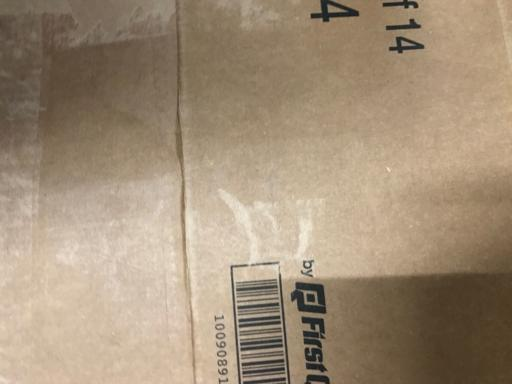

Predicted Image:


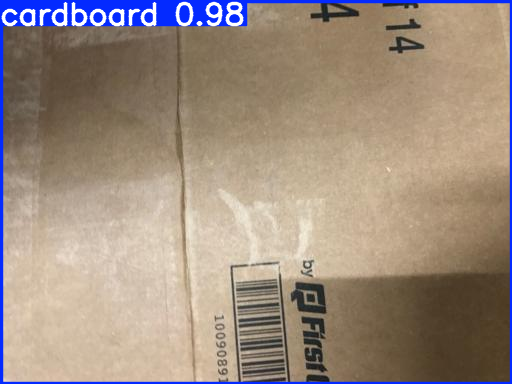

In [ ]:
from IPython.display import Image, display
import glob

# image_path = get_random_test_image_path()
image_path = Path('/content/1-7cf2ba66.png')
predict_test_image(image_path)

# Find the latest prediction run folder
list_of_files = glob.glob('/content/runs/detect/trash_prediction*')
latest_run_folder = max(list_of_files, key=os.path.getctime)

# Get the path of the predicted image
predicted_image_path = os.path.join(latest_run_folder, image_path.name)

# Display the original and predicted images
print("Original Image:")
display(Image(filename=image_path.absolute()))

print("Predicted Image:")
display(Image(filename=predicted_image_path))

# 模型部署

In [ ]:
import sys
sys.path.append('/content/yolov5')

from yolov5.models.common import DetectMultiBackend
from yolov5.utils.torch_utils import select_device

device = select_device('cpu')
model = DetectMultiBackend('best.pt', device=device)

YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs


In [ ]:
import cv2
import numpy as np
import torch
from yolov5.utils.general import non_max_suppression, scale_boxes
from yolov5.utils.augmentations import letterbox

def predict_image(model, image_path):
  im0 = cv2.imread(image_path)

  img = letterbox(im0, new_shape=640, stride=model.stride, auto=True)[0]
  img = img.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB

  img = np.ascontiguousarray(img)

  img = torch.from_numpy(img).to(device)
  img = img.float() / 255.0  # 歸一化
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # 推論
  pred = model(img, augment=False, visualize=False)
  pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45)

  # 處理結果
  results = []
  for det in pred:
    if det is not None and len(det):
      det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], im0.shape).round()
      for *xyxy, conf, cls in det:
        label = f"{model.names[int(cls)]} {conf:.2f}"
        results.append({
          'label': label,
          'conf': float(conf),
          'class_id': int(cls)
        })

  return results

predict_image(model, '/content/1-7cf2ba66.png')

[{'label': 'cardboard 0.98', 'conf': 0.9837840795516968, 'class_id': 0}]

# 其他

In [ ]:
import shutil
from google.colab import files

def download_folder(folder_path, zip_file_name):
  shutil.make_archive(zip_file_name, 'zip', folder_path)
  files.download(zip_file_name + '.zip')

download_folder('/content/runs/val/trash_eval2', 'trash_eval.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!wget https://github.com/OctavDM/Trashnet_annotations/raw/main/cleaned_data.zip
!wget https://github.com/OctavDM/Trashnet_annotations/raw/main/cleaned_data_annotations.zip
!unzip -q cleaned_data.zip -d dataset
!unzip -q cleaned_data_annotations.zip -d dataset

--2025-06-03 03:08:35--  https://github.com/OctavDM/Trashnet_annotations/raw/main/cleaned_data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OctavDM/Trashnet_annotations/main/cleaned_data.zip [following]
--2025-06-03 03:08:36--  https://raw.githubusercontent.com/OctavDM/Trashnet_annotations/main/cleaned_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42682219 (41M) [application/zip]
Saving to: ‘cleaned_data.zip’

cleaned_data.zip    100%[===================>]  40.70M   153MB/s    in 0.3s    

2025-06-03 03:08:36 (153 MB/s) - ‘cleaned_data.zip’ saved [42682219/42682219]

--2025-06-

In [ ]:
import os
from pathlib import Path

dataset_path = Path('/content/dataset')
image_path = dataset_path / 'images'
label_path = dataset_path / 'labels'

splites = ['train', 'val', 'test']
for split in splites:
  (image_path / split).mkdir(parents=True, exist_ok=True)
  (label_path / split).mkdir(parents=True, exist_ok=True)

image_src_path = dataset_path / 'cleaned_data'
label_src_path = dataset_path / 'annotations'

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

all_images = []
for cls_name in classes:
  image



# import os
# import shutil
# from pathlib import Path
# from sklearn.model_selection import train_test_split

# # 定義資料集路徑
# dataset_path = Path('/content/dataset')
# image_path = dataset_path / 'images'
# label_path = dataset_path / 'labels'

# # 定義資料夾結構
# splits = ['train', 'val', 'test']
# for split in splits:
#     (image_path / split).mkdir(parents=True, exist_ok=True)
#     (label_path / split).mkdir(parents=True, exist_ok=True)

# # 定義原始資料集路徑
# original_data_path = Path('/content/dataset/cleaned_data')

# # 定義標註檔案路徑
# annotations_path = Path('/content/dataset/annotations')

# # 定義類別名稱
# classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# # 準備圖片與標註檔案
# all_images = []
# for class_name in classes:
#     class_image_path = original_data_path / class_name / 'test'
#     class_annotation_path = annotations_path / class_name / 'test'
#     if class_image_path.exists() and class_annotation_path.exists():
#         images = list(class_image_path.glob('*.jpg'))
#         for img_path in images:
#             annotation_path = class_annotation_path / img_path.stem
#             if annotation_path.with_suffix('.xml').exists():
#                 all_images.append((img_path, annotation_path.with_suffix('.xml'), class_name))

# # 分割資料集
# train_data, test_data = train_test_split(all_images, test_size=0.2, random_state=42)
# train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

# datasets = {
#     'train': train_data,
#     'val': val_data,
#     'test': test_data
# }

# # 複製圖片與標註檔案
# for split, data in datasets.items():
#     for img_path, ann_path, class_name in data:
#         img_dest = image_path / split / img_path.name
#         shutil.copy(img_path, img_dest)

#         label_dest = label_path / split / img_path.stem
#         shutil.copy(ann_path, label_dest.with_suffix('.xml'))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import xml.etree.ElementTree as ET

# 定義轉換函數
def convert_annotation(xml_file, label_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    with open(label_file, 'w') as out_file:
        for obj in root.iter('object'):
            class_name = obj.find('name').text
            if class_name in classes:
                class_id = classes.index(class_name)
                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                # 計算 YOLO 格式的標註
                x_center = (xmin + xmax) / 2
                y_center = (ymin + ymax) / 2
                width = xmax - xmin
                height = ymax - ymin
                # 寫入標註檔案
                out_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# 轉換標註檔案
for split in splits:
    for class_name in classes:
        class_label_path = label_path / split / class_name
        for xml_file in class_label_path.glob('*.xml'):
            label_file = xml_file.with_suffix('.txt')
            convert_annotation(xml_file, label_file)
